# Exploratory Analysis

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.dataset.kay import load_dataset
from src.utils.util import filter_voxel_by_roi
from src.explore.summary import plot_hierarchical_labels

In [2]:
%matplotlib inline

sns.set(style="ticks", context="talk")
plt.style.use("dark_background")


title_size = 16
params = {
    "legend.fontsize": "large",
    "axes.labelsize": title_size - 2,
    "axes.titlesize": title_size,
    "xtick.labelsize": title_size - 4,
    "ytick.labelsize": title_size - 4,
    "axes.titlepad": 1.5 * title_size,
}

plt.rcParams.update(params)

## Data Content

`all_data` contains:

- `stimuli`: stim xixj array of grayscale stimulus images
- `stimuli_test`: stim xixj array of grayscale stimulus images in the test set
- `responses`: stim x voxel array of z-scored BOLD response amplitude
- `responses_test`: stim x voxel array of z-scored BOLD response amplitude in the test set
- `roi`: array of voxel labels
- `roi_names`: array of names corresponding to voxel labels
- `train_labels`: training image labels
- `test_labels`: testing image labels

In [3]:
all_data = load_dataset(data_path="./../data/")

## Data Shapes

In [4]:
for k in all_data.keys():
    print(f"'{k:15}':  {all_data[k].shape},")

'stimuli        ':  (1750, 128, 128),
'stimuli_test   ':  (120, 128, 128),
'responses      ':  (1750, 8428),
'responses_test ':  (120, 8428),
'roi            ':  (8428,),
'roi_names      ':  (8,),
'train_labels   ':  (1750, 4),
'test_labels    ':  (120, 4),


## Stimuli

In [5]:
all_data["stimuli"].shape

(1750, 128, 128)

In [6]:
single_image = all_data["stimuli"][0]
single_image.shape

(128, 128)

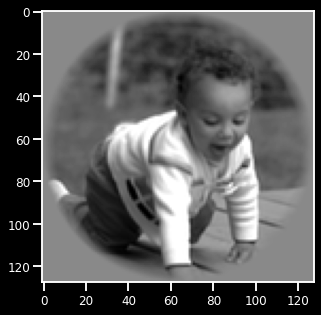

In [7]:
plt.figure(figsize=(5, 5))
plt.imshow(single_image, cmap="gray")

## Stimuli Labels

There are 4 levels of labels available.

### Hierarchical Label Count

Text(0.5, 0.98, 'Hierarchical Count of Labels')

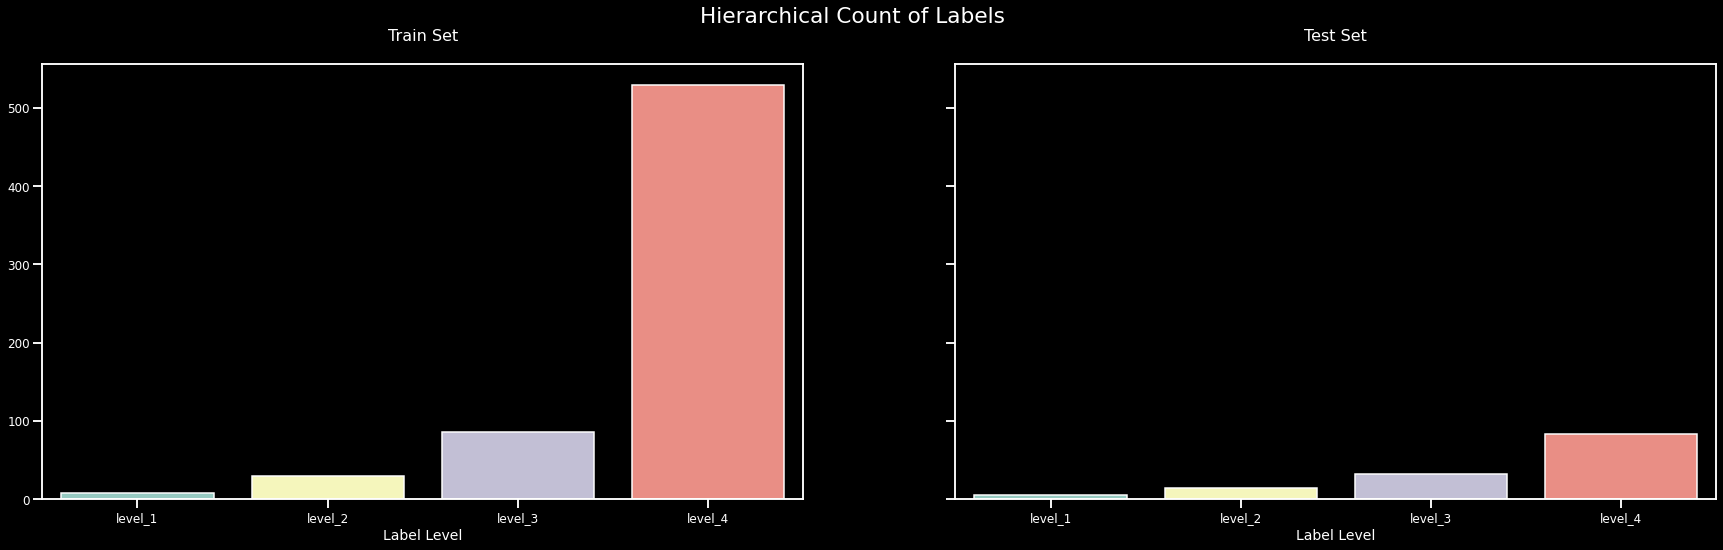

In [8]:
label_levels_dict_train = {
    "level_1": all_data["train_labels"][:, 0],
    "level_2": all_data["train_labels"][:, 1],
    "level_3": all_data["train_labels"][:, 2],
    "level_4": all_data["train_labels"][:, 3],
}

label_levels_dict_test = {
    "level_1": all_data["test_labels"][:, 0],
    "level_2": all_data["test_labels"][:, 1],
    "level_3": all_data["test_labels"][:, 2],
    "level_4": all_data["test_labels"][:, 3],
}


fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30, 8), sharey=True)
sns.barplot(
    x=list(label_levels_dict_train.keys()),
    y=[len(np.unique(v)) for v in label_levels_dict_train.values()],
    ax=axes[0],
)
axes[0].set_title("Train Set")
axes[0].set_xlabel("Label Level")

sns.barplot(
    x=list(label_levels_dict_test.keys()),
    y=[len(np.unique(v)) for v in label_levels_dict_test.values()],
    ax=axes[1],
)
axes[1].set_title("Test Set")
axes[1].set_xlabel("Label Level")

plt.suptitle("Hierarchical Count of Labels")

#### Level-1 Classes

##### Train Set

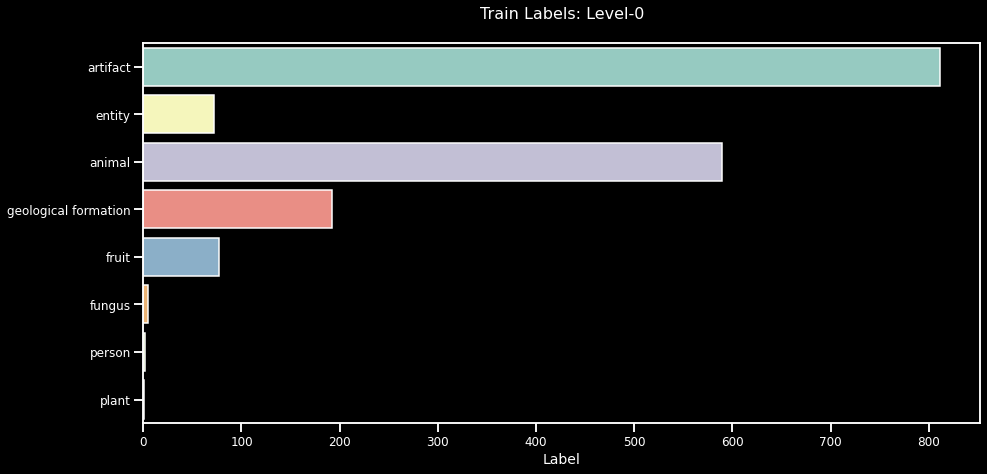

In [9]:
plot_hierarchical_labels(all_data=all_data, label_type="train", label_level=0)

##### Test Set

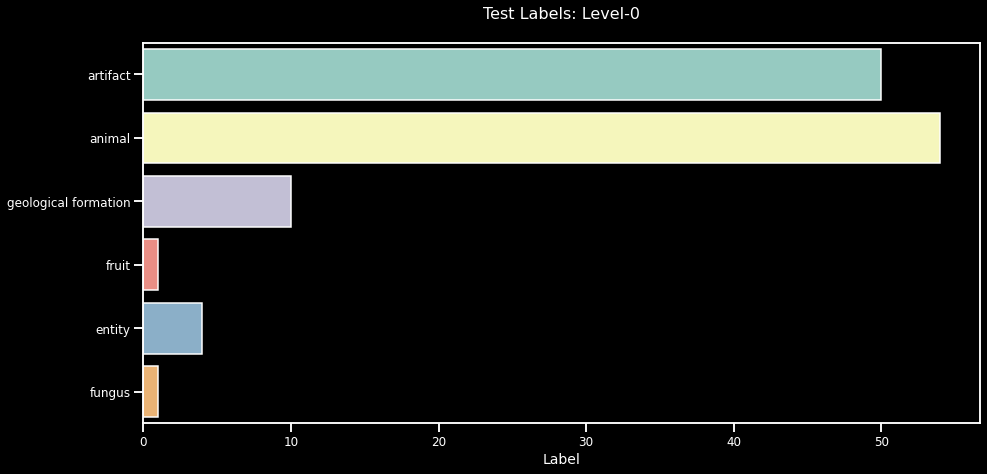

In [10]:
plot_hierarchical_labels(all_data=all_data, label_type="test", label_level=0)

#### Level-2 Classes

##### Train Set

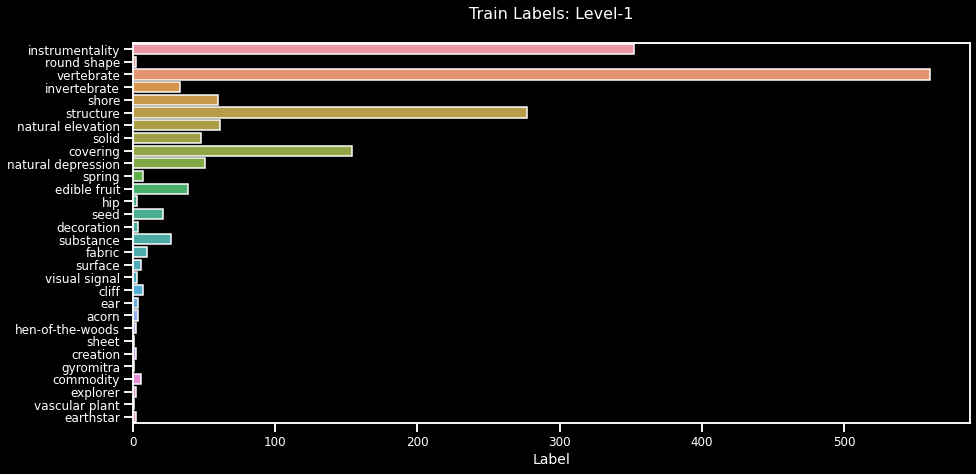

In [12]:
plot_hierarchical_labels(all_data=all_data, label_type="train", label_level=1)

##### Test Set

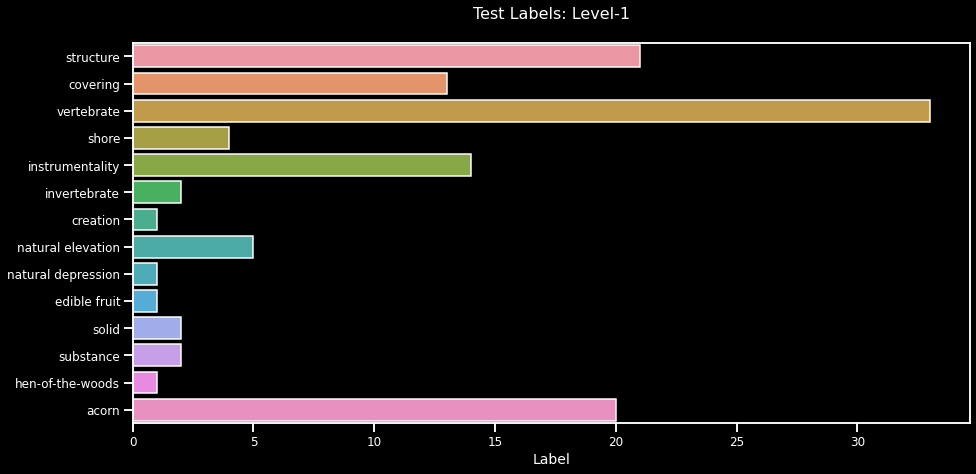

In [11]:
plot_hierarchical_labels(all_data=all_data, label_type="test", label_level=1)

Level-3 and Level-4 have a over 100 classes and hence are not plotted here.

## Voxel ROI

Text(0.5, 0, 'Voxel ROI')

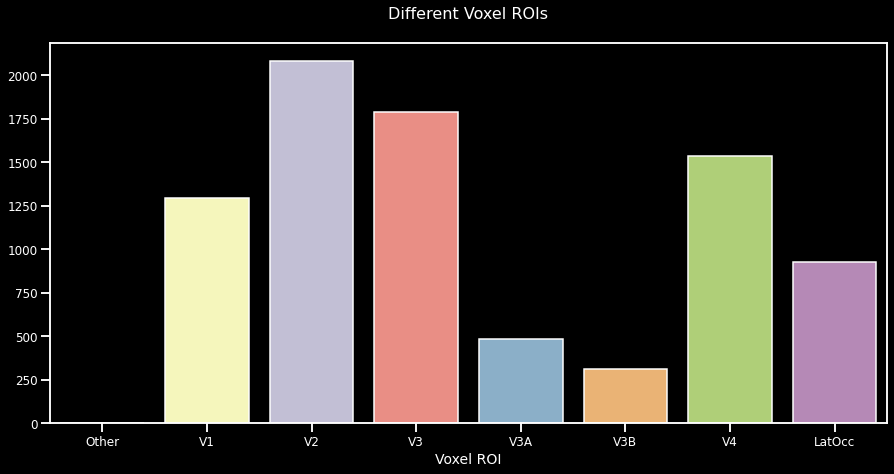

In [13]:
idx2voxel = {v: k for v, k in enumerate(list(all_data["roi_names"]))}
voxel_roi_count = {k: 0 for k in all_data["roi_names"]}

for v in list(all_data["roi"]):
    voxel_roi_count[idx2voxel[v]] += 1

plt.figure(figsize=(15, 7))
sns.barplot(x=list(voxel_roi_count.keys()), y=list(voxel_roi_count.values()))
plt.title("Different Voxel ROIs")
plt.xlabel("Voxel ROI")

## Voxel Responses

In [14]:
single_response = all_data["responses"][0]
single_response.shape

(8428,)

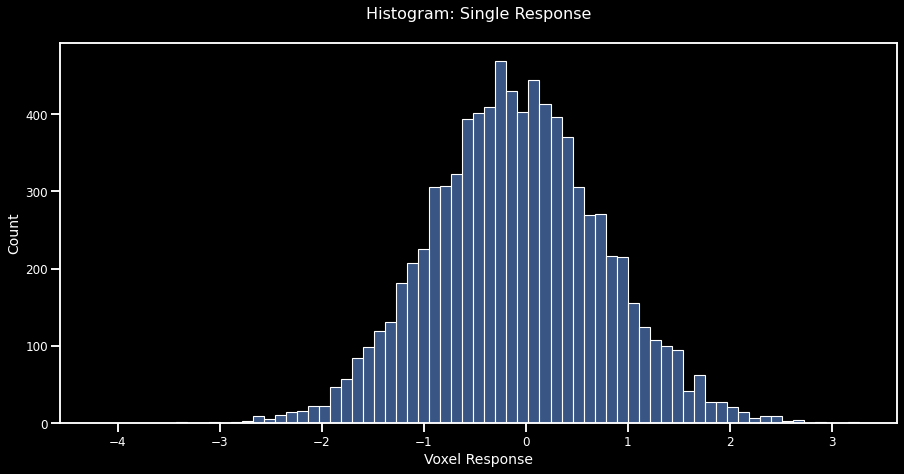

In [15]:
plt.figure(figsize=(15, 7))
sns.histplot(single_response)
plt.title("Histogram: Single Response")
plt.xlabel("Voxel Response")
plt.ylabel("Count")
plt.show()

## Filter Voxel Response Based On ROI

In [16]:
for i in range(1, 8):
    print(
        f'Response shape for Voxel ROI = {i}: {all_data["responses"][:, filter_voxel_by_roi(all_data, [i])].shape}'
    )

Response shape for Voxel ROI = 1: (1750, 1294)
Response shape for Voxel ROI = 2: (1750, 2083)
Response shape for Voxel ROI = 3: (1750, 1789)
Response shape for Voxel ROI = 4: (1750, 484)
Response shape for Voxel ROI = 5: (1750, 314)
Response shape for Voxel ROI = 6: (1750, 1535)
Response shape for Voxel ROI = 7: (1750, 928)
